In [1]:
%cd /content/drive/MyDrive/SMHRD-DL

/content/drive/MyDrive/SMHRD-DL


In [2]:
# 경고메시지 출력 X
import warnings
warnings.filterwarnings('ignore')

### 로이터 뉴스 데이터 로딩

In [3]:
from tensorflow.keras.datasets import reuters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 데이터 불러오기

In [4]:
(X_train, y_train), (X_test, y_test) = reuters.load_data()

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [5]:
# 수치화/토큰화 진행되어 있는 데이터셋
# 뉴스 기사마다 길이가 다름
# 빈도수를 기반으로 수치화가 되어 있음 -> 숫자가 작을수록 자주 등장하는 단어
X_train

array([list([1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 30625, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4

#### 단어사전 확인해보기

In [6]:
reuters.get_word_index()

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

#### 정답데이터 종류 확인
- 0 ~ 45 -> 46개 종류의 주제로 구분된 기사

In [7]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

#### 정답 데이터의 종류별 개수 확인

In [8]:
np.unique(y_train, return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 array([  55,  432,   74, 3159, 1949,   17,   48,   16,  139,  101,  124,
         390,   49,  172,   26,   20,  444,   39,   66,  549,  269,  100,
          15,   41,   62,   92,   24,   15,   48,   19,   45,   39,   32,
          11,   50,   10,   49,   19,   19,   24,   36,   30,   13,   21,
          12,   18]))

### 모델 학습 전 전처리
- 학습을 위해 뉴스기사의 길이를 맞춰줘야 함
- 길이가 긴 뉴스 기사는 단어를 잘라서 축소
- 길이가 짧은 뉴스기사는 패딩작업을 통해 0을 채워 확장해줘야 함

#### 뉴스기사 길이 확인
- 적절한 길이 찾기

In [9]:
train_len = [len(doc) for doc in X_train]

In [10]:
print('최소값 : ', min(train_len))
print('최대값 : ', max(train_len))
print('평균값 : ', np.mean(train_len))
print('중앙값 : ', np.median(train_len))

최소값 :  13
최대값 :  2376
평균값 :  145.5398574927633
중앙값 :  95.0


#### 길이에 해당하는 뉴스 기사 개수 파악
- 데이터의 밀도 확인 : histogram
- X축 : 뉴스 기사 구간별 표시
- y축 : 뉴스 기사의 개수

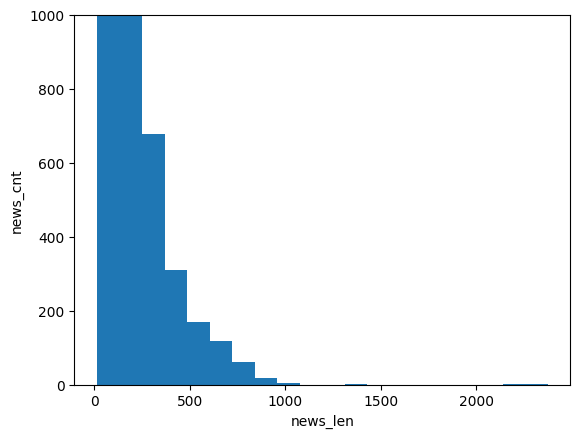

In [11]:
plt.hist(train_len, bins = 20)
plt.xlabel('news_len')
plt.ylabel('news_cnt')
plt.ylim(0, 1000)
plt.show()

#### 문장 길이를 120으로 맞춰보기
- 평균값과 중앙값을 고려했을 때, 히트로그램을 통해 적절한 문장 길이가 120 정도라는 것을 확인 완료

In [12]:
from tensorflow.keras.preprocessing import sequence

In [13]:
X_train_seq = sequence.pad_sequences(X_train, maxlen = 120)
X_test_seq = sequence.pad_sequences(X_test, maxlen = 120)

In [14]:
X_train_seq.shape, X_test_seq.shape

((8982, 120), (2246, 120))

In [15]:
X_train_seq[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     1, 27595, 28842,
           8,    43,    10,   447,     5,    25,   207,   270,     5,
        3095,   111,    16,   369,   186,    90,    67,     7,    89,
           5,    19,   102,     6,    19,   124,    15,    90,    67,
          84,    22,   482,    26,     7,    48,     4,    49,     8,
         864,    39,   209,   154,     6,   151,     6,    83,    11,
          15,    22,   155,    11,    15,     7,    48,     9,  4579,
        1005,   504,     6,   258,     6,   272,    11,    15,    22,
         134,    44,    11,    15,    16,     8,   197,  1245,    90,
          67,    52,    29,   209,    30,    32,   132,     6,   109,
          15,    17,    12], dtype=int32)

#### 차원 변환
- RNN에서 사용하기 위해서는 차원을 늘려줘야 함
- 1차원 -> 2차원 형태 (행 120개, 열 1개)

In [16]:
X_train_seq = X_train_seq.reshape(8982, 120, 1)
X_test_seq = X_test_seq.reshape(2246, 120, 1)

In [17]:
X_train_seq.shape

(8982, 120, 1)

### 모델링 진행

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

#### 1. SimpleRNN 한 층만 사용해보기
- 모델 뼈대 생성

In [19]:
model_1 = Sequential()

# input_shape(timesteps, feature)
# timesteps : 순환 횟수(입력데이터가 몇 번 들어오는지)
model_1.add(SimpleRNN(128, input_shape = (120, 1))) # activation : RNN의 기본값(tanh 사용)
model_1.add(Dense(64, activation = 'relu'))
model_1.add(Dense(46, activation = 'softmax'))

In [20]:
y_train_oh = pd.get_dummies(y_train)
y_test_oh = pd.get_dummies(y_test)

In [21]:
model_1.compile(optimizer = 'adam',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [22]:
h1 = model_1.fit(X_train_seq,
                 y_train_oh,
                 epochs = 20
                )

Epoch 1/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.3252 - loss: 2.5982
Epoch 2/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3416 - loss: 2.3775
Epoch 3/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.3573 - loss: 2.3581
Epoch 4/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3578 - loss: 2.3425
Epoch 5/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3654 - loss: 2.2907
Epoch 6/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3558 - loss: 2.3176
Epoch 7/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3753 - loss: 2.2672
Epoch 8/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3694 - loss: 2.2654
Epoch 9/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3724 - loss: 2.2467
Epoch 10/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3642 - loss: 2.2421
Epoch 11/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3681 - loss: 2.2316
Epoch 12/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 1

In [23]:
model_2 = Sequential()

model_2.add(SimpleRNN(128, input_shape = (120, 1), return_sequences = True))
model_2.add(SimpleRNN(64, return_sequences = True))
model_2.add(SimpleRNN(64))

model_2.add(Dense(64, activation = 'relu'))
model_2.add(Dense(46, activation = 'softmax'))

In [24]:
model_2.compile(optimizer = 'adam',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [25]:
h2 = model_2.fit(X_train_seq,
                 y_train_oh,
                 epochs = 20
                )

Epoch 1/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.3294 - loss: 2.6281
Epoch 2/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.3907 - loss: 2.3015
Epoch 3/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.3945 - loss: 2.2813
Epoch 4/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.3551 - loss: 2.3572
Epoch 5/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.3924 - loss: 2.2688
Epoch 6/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.3855 - loss: 2.2397
Epoch 7/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.3949 - loss: 2.2362
Epoch 8/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.4013 - loss: 2.1958
Epoch 9/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.4121 - loss: 2.1673
Epoch 10/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.4066 - loss: 2.1740
Epoch 11/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.4172 - loss: 2.1905
Epoch 12/20
281/281 ━━━━━━━━━━━━━━━━

### LSTM 사용하기(장단기 기억 메모리)
- 시퀀스의 길이가 길어질수록 기억값이 감소하는 RNN의 단점을 보완
- LSTM은 기억값을ㄹ 별도로 관리 -> 중요한 기억은 강조하고, 불필요한 기억은 삭제

In [26]:
from tensorflow.keras.layers import LSTM

In [27]:
model_3 = Sequential()

model_3.add(LSTM(128, input_shape = (120, 1), return_sequences = True))
model_3.add(LSTM(64, return_sequences = True))
model_3.add(LSTM(64))

model_3.add(Dense(64, activation = 'relu'))
model_3.add(Dense(46, activation = 'softmax'))

In [28]:
model_3.compile(optimizer = 'adam',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [29]:
h3 = model_3.fit(X_train_seq,
                 y_train_oh,
                 epochs = 20
                )

# 단어와 단어 사이의 관계를 밀집된 표현으로 재구성할 필요가 있음 -> WordEmbedding

Epoch 1/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.3227 - loss: 2.5778
Epoch 2/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4696 - loss: 2.1031
Epoch 3/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.4689 - loss: 2.0753
Epoch 4/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.4662 - loss: 2.0632
Epoch 5/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4791 - loss: 2.0349
Epoch 6/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.4719 - loss: 2.0421
Epoch 7/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.4740 - loss: 2.0351
Epoch 8/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4779 - loss: 1.9902
Epoch 9/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.4756 - loss: 1.9901
Epoch 10/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4838 - loss: 1.9609
Epoch 11/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4895 - loss: 1.9053
Epoch 12/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 

### WordEmbedding
- RNN에서 기존에 사용하던 원핫인코딩 방식으로 자연어처리를 할 경우 컴퓨터가 이해하기 어렵다는 문제가 발생
- 이런 문제를 해결하기 위해 최소표현(원 핫 인코딩) -> 밀집포현(실수 형태) 방식으로 변환
- 한 단어의 의미를 풍부하게 만들어주는 역할
- 단어들의 유사도(코사인 유사도)를 판단해 예측에 반영

In [36]:
from tensorflow.keras.layers import Embedding

In [37]:
X_train_seq = X_train_seq.reshape(8982, 120)
X_test_seq = X_test_seq.reshape(2246, 120)

In [38]:
print(X_train_seq.shape)
print(X_test_seq.shape)
print(y_train_oh.shape)
print(y_test_oh.shape)

(8982, 120)
(2246, 120)
(8982, 46)
(2246, 46)


In [44]:
model_4 = Sequential()

model_4.add(Embedding(input_dim = 1000, output_dim = 50))
model_4.add(LSTM(128, return_sequences = True))
model_4.add(LSTM(64))

model_4.add(Dense(64, activation = 'relu'))
model_4.add(Dense(46, activation = 'softmax'))

model_4.build(input_shape = (None, 120))
model_4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 120, 50)        │        50,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 120, 128)       │        91,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,206 (774.24 KB)

 Trainable params: 198,206 (774.24 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model_4.compile(optimizer = 'adam',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [43]:
h4 = model_4.fit(X_train_seq,
                 y_train_oh,
                 epochs = 20
                )

Epoch 1/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.3497 - loss: 2.6699
Epoch 2/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3457 - loss: 2.4261
Epoch 3/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4052 - loss: 2.2722
Epoch 4/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.4715 - loss: 1.9878
Epoch 5/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5319 - loss: 1.8071
Epoch 6/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5667 - loss: 1.6825
Epoch 7/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5656 - loss: 1.6734
Epoch 8/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5795 - loss: 1.6189
Epoch 9/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5978 - loss: 1.5653
Epoch 10/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6189 - loss: 1.4884
Epoch 11/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6499 - loss: 1.3986
Epoch 12/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 